# Multiple Linear Regression

## First exercise with Cardekho database

This exercise is made to show how to use multiple linear regression with scikit-learn. The `LinearRegression` object is actually sufficient to make this kind of survey.
All you will have to learn is how to pass data to `LinearRegression` so that it will fit the model and how to understand/analyse the result of your machine learning study.
The dataset from Cardekho is reused to find out a relationship between two independent variables and one dependant variable.

As a reminder columns of that dataset are:
- *Car_Name* The Name of the car
- *Year* The release year of that car (Year it was bought for the first time)
- *Selling_Price* The price it is sold
- *Km_driven* The kms driven with the car
- *Fuel* The type of fuel: Diesel, Petrol, Liquefied Petroleum Gas (LPG) or Compressed Natural Gas (CNG)
- *Seller_type* The type of seller that proposes the car: individual, car dealer or trustmark dealer
- *Transmission* Manual or Automatic
- *Owner* Number of previous owner
- *mileage* Consumption in km per l
- *engine* Dimension of the engine
- *max_power* Maximum power
- *Torque* Torque of the car
- *Seats* Number of seats

The relationship researched is between the couple (Year,Km_driven) and Selling_price. Use `LinearRegression` from sklearn to perform the analysis.

In [3]:
import pandas as pd
pd.set_option("display.max_rows", 16)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# LOADING THE DATASET
# THE DATASET SHOULD BE ALONG WITH THE NOTEBOOK AND THE PYTHON FILE

df = pd.read_csv('Cardekho.csv')
df['Selling_price']=0.013*df['Selling_price'] # Change the values from Indian Roupies to Us Dollar
df.head()

,Car_Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,5850.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2054.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,2925.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1690.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Preparing the data

To perform multiple linear regression, the input X and y corresponding to the requested analysis must be prepared. Therefore:
- *X* must be a vector of dimension (n_samples,2) with *n_samples* the amount of samples and 2 corresponding to the number of different features (Year and Km driven).
- *y* is a vector of the corresponding target values (Selling_price) that is of dimension (n_samples,)

Please split your data randomly into a training and a testing set. This is done using the function `train_test_split`. It splits arrays or matrices into random train and test subsets.
It is called as follows:

`X_train, X_test, y_train, y_test = train_test_split(X, y, options)`

Following options will be most useful:
- *test_size* can be a float or an int. If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If *train_size* is also None, it will be set to 0.25.
- *train_size* is similar to *test_size* and can be a float or an int. If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.
- *random_state* Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. This int value is a numerical seed used for randomization.
- *shuffle* is a bool. It decides whether or not to shuffle the data before splitting.

### Training the model

Use the corresponding *X_train* and *y_train* to train a LinearRegression model, just as it was done in the previous simple linear regression exercises.

In [29]:
X_Year=np.array(df['Year']).reshape(-1,1)
X_Km=np.array(df['Km_driven']).reshape(-1,1)
X=np.concatenate((X_Year,X_Km),axis=1)
y=np.array(df['Selling_price']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

regr_Price = LinearRegression().fit(X_train,y_train)

In [43]:
X=np.array([df['Year'],df['Km_driven']]).reshape(-1,2)
X.shape
X_Km=np.array(df['Km_driven']).reshape(-1,1)
df['Km_driven'].to_numpy().reshape(-1,1).shape
X=np.concatenate((X_Year,X_Km),axis=1)
X.shape
regr_Price
X

array([[  2014, 145500],
       [  2014, 120000],
       [  2006, 140000],
       ...,
       [  2009, 120000],
       [  2013,  25000],
       [  2013,  25000]], dtype=int64)

To view the result of the linear regression model, a 3D graph has to be plotted. Therefore, the Axes3D function from matplotlib will be used. This is a special toolkit that has to be called separately from matplotlib. It is called on an already existing figure and the orientation of the view can be specified:

`ax = Axes3D(fig, elev, azim)`

With:
- *fig* the figure object from matplotlib
- *elev* the elevation viewing angle in spherical coordinates
- *azim* the azimuthal viewing angle in spherical coordinates

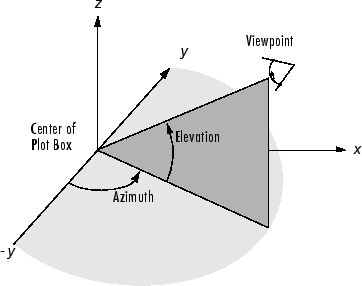

Afterwards, plotting function can be used on the 3d axis: *scatter* allows to create a scatter plot and *surface* permits the drawing of surface area.


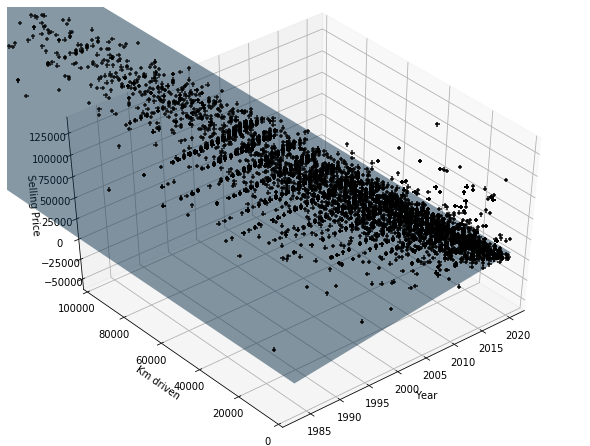

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output

# DO NOT EDIT -- This creates the figure environment where the 3D graph will be drawn
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
elev = 45
azim = -130
ax = Axes3D(fig, elev=elev, azim=azim)

# This allows to create a vector containing min and max values for each parameters to plot a surface
# representing the model that was fitted
Year_min=X_train[:, 0].min()
Year_max=X_train[:, 0].max()
Km_min=X_train[:, 1].min()
Km_max=X_train[:, 1].max()
X_Surf=np.array([[Year_min, Year_min, Year_max, Year_max],[Km_min, Km_max, Km_min, Km_max]])

# This is the matrix containing the prediction
y_pred_Surf=regr_Price.predict(X_Surf.T).reshape((2, 2))

# This plots the training datas as scatters
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')

# This plots the surface representing the model
ax.plot_surface(X_Surf.T[:,0].reshape((2, 2)),
                X_Surf.T[:,1].reshape((2, 2)),
                y_pred_Surf,
                alpha=.5)
ax.set_xlabel('Year')
ax.set_ylabel('Km driven')
ax.set_zlabel('Selling Price')
ax.set_ylim(0, 100000)

plt.show()

The code below allows to see an animated view of the plane by rotating the grid around the axis selling price.

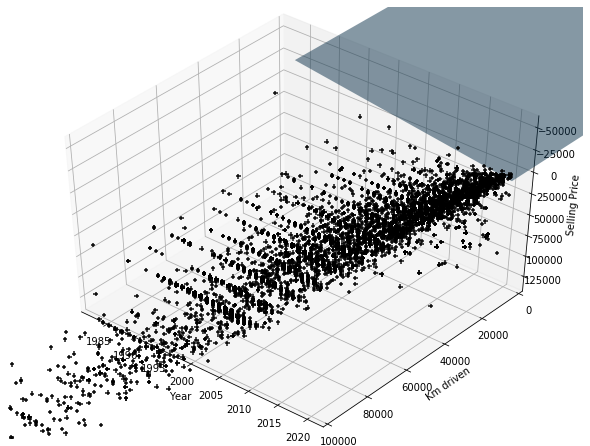

In [36]:
animate = lambda i: ax.view_init(elev+angle, azim)
# rotate the axes and update
for angle in range(0, 5): ## To be edited to range(0, 360)
    animate(angle)
    clear_output(wait=True)
    display(fig)

### Using the model to make predictions

The obtained linear regression model can be used to get a value for the price of any car to be put on sales according that you would know the amount of km driven and the release year of that car.

To use the method `.predict()` you have to adapt the inputs to the shape (1,2).

- Try to find the price of a brand new car (0 km) of 1985. (round it to cents)

- Try to find the price of a car of 2018 with 200 000 km driven. (round it to cents)

- According to the model, are there recent cars (year>2000) with a negative price ? Show that there is at least one car that has a negative predicted value.

- Is it possible to get the limit when values get close to zero ?

In [50]:
X_new1985=np.array([1985,0]).reshape(1,-1)
round(regr_Price.predict(X_new1985)[0][0],2)

-18990.33

In [49]:
X_new1985=np.array([0,1985]).reshape(1,-1)
X_new1985.shape
X_new1985

array([[   0, 1985]])

In [54]:
X_car2018=np.array([2018,200000]).reshape(1,-1)
round(regr_Price.predict(X_car2018)[0][0],2)

10759.43

In [64]:
X_car2000=np.array([2000,0]).reshape(1,-1)
round(regr_Price.predict(X_car2000)[0][0],2)

-4342.48

In [65]:
print(f'f(Year,km driven)= {regr_Price.coef_[0,0]} * Year + {regr_Price.coef_[0,1]} * km driven + {regr_Price.intercept_[0]}')

f(Year,km driven)= 976.5230792743909 * Year + -0.012377525550215571 * km driven + -1957388.6402222316


In [62]:
regr_Price.intercept_
regr_Price.coef_

array([[ 9.76523079e+02, -1.23775256e-02]])

Help for the 4th question: Find the limit for each year from 1985 to 2018, when you get a zero value for a certain amount of `km_driven`.

$y= \alpha_0 * \textrm{Year} + \alpha_1 * \textrm{Km driven} + \beta$

With:
- $\beta$ the intercept value.
- $\alpha_0$ the "year" coefficient
- $\alpha_1$ the "km_driven" coefficient

For each year we create a new value of beta:

$\beta_2=\alpha_0 * \textrm{Year} + \beta$

$\beta_2$ is called `New_Intercept`

It is then easier to solve the zero crossing (y=0):

$0=\alpha_1 * \textrm{Km driven} + \beta_2$

$\textrm{Km driven (Price=0)}= -\frac{\beta_2}{\alpha_1}$

f(Year,km driven)= 976.5230792743909 * Year + -0.012377525550215571 * km driven + -1957388.6402222316


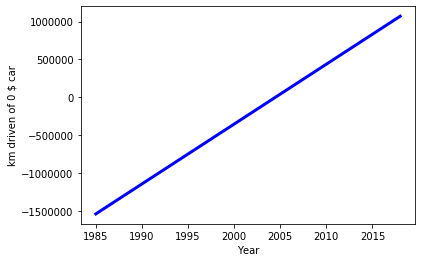

array([-1534258.82948269, -1455363.97482756, -1376469.12017243,
       -1297574.26551729, -1218679.41086218, -1139784.55620705,
       -1060889.70155191,  -981994.8468968 ,  -903099.99224167,
        -824205.13758653,  -745310.2829314 ,  -666415.42827628,
        -587520.57362115,  -508625.71896602,  -429730.86431088,
        -350836.00965577,  -271941.15500064,  -193046.3003455 ,
        -114151.44569039,   -35256.59103526,    43638.26361988,
         122533.11827501,   201427.97293012,   280322.82758526,
         359217.68224039,   438112.53689551,   517007.39155064,
         595902.24620577,   674797.1008609 ,   753691.95551602,
         832586.81017115,   911481.66482629,   990376.51948142,
        1069271.37413653])

In [78]:
print(f'f(Year,km driven)= {regr_Price.coef_[0,0]} * Year + {regr_Price.coef_[0,1]} * km driven + {regr_Price.intercept_[0]}')

Year=np.arange(1985,2019,1)

New_Intercept = regr_Price.coef_[0,0]*Year+regr_Price.intercept_[0]

Km_driven_0= - New_Intercept / regr_Price.coef_[0,1]

fig = plt.figure()
plt.clf()
plt.plot(Year, Km_driven_0, color='blue', linewidth=3)
plt.xlabel("Year")
plt.ylabel("km driven of 0 $ car")
plt.show()
Km_driven_0

In [86]:
Year=np.arange(1985,2019,1)
print(Year)
regr_Price.coef_[0,0]*Year
New_Intercept = regr_Price.coef_[0,0]*Year+regr_Price.intercept_[0]
New_Intercept

dt=0.2
Year=np.arange(0,5+dt,dt)
Year

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]


array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

### Estimating the precisions of the model

Use the different learned metrics from the previous lesson (simple linear regression) to assess the precision of the model. Remember that these metrics only depend on the *y* values.

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

regr_Price_pred = regr_Price.predict(X_test)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test, regr_Price_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, regr_Price_pred))

sqrt(Mean squared error): 9673.77
Coefficient of determination: 0.18


### Using another factor

The column of the engine dimension can be processed to become a numerical value. This will allow to make better predictions.
The more information you would get from the dataset the more accurate your predictions should be.

In [95]:
df=df.dropna() #This will require a new generation of all data vectors
df['engine']=df['engine'].apply(lambda x: int(str(x).strip(' CC')))

X_Year=np.array(df['Year']).reshape(-1,1)
X_Engine=np.array(df['engine']).reshape(-1,1)
X_Km=np.array(df['Km_driven']).reshape(-1,1)
new_y=np.array(df['Selling_price']).reshape(-1,1)
new_X=np.concatenate((X_Year,X_Km,X_Engine),axis=1)


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_X, new_y, test_size=0.25, random_state=15)

regr_Price_new = LinearRegression().fit(X_train_new,y_train_new)

regr_Price_pred_new = regr_Price_new.predict(X_test_new)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test_new, regr_Price_pred_new)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_new, regr_Price_pred_new))

sqrt(Mean squared error): 8653.20
Coefficient of determination: 0.39


In [93]:
df.head()
df=df.dropna()
df['engine']=df['engine'].apply(lambda x: int(str(x).strip(' CC')))
df.head()
X_test_new.shape

(1977, 3)

## Second exercise with a financial database

This exercise is made to show how to apply multiple linear regression with scikit-learn. It is based on a stock market database that will be analysed and used to make a `LinearRegression` model learn. The objective is clear: predict the evolution of the stock price by the end of the next session.

* Step 1: Import libraries and load the data into the environment.
* Step 2: Generate the features of the model that are related with some measure of volatility, price and volume. 
* Step 3: Visualize the correlation between the features and target variable with scatterplots.
* Step 4: Create the train and test dataset and fit the model using the linear regression algorithm. 
* Step 5: Make predictions, obtain the performance of the model, and plot the results. 

### Import libraries and load the data into the environment.

We will first import the required libraries in our Python environment. Data to be used here is SPY_regression.csv.

That data, is real and comes from: https://finance.yahoo.com/quote/SPY/history/.
It is the price of a stock coming from the SPDR funds (pronounced "spider"). This funds are a family of exchange-traded funds (ETFs) traded in the United States, Europe, and Asia-Pacific and managed by State Street Global Advisors (SSGA). SPDR is a trademark of Standard and Poor's Financial Services LLC, a subsidiary of S&P Global. SPDR means Standard and Poor's Depository Receipt.

The name is an acronym for the first member of the family, the Standard & Poor's Depositary Receipts, now the SPDR S&P 500, which is designed to track the S&P 500 stock market index. For a long time, this fund was the largest ETF in the world. SSGA also manage the SPDR Gold Shares, which for a while was the second-largest ETF in the world.

It is a table that contain information on stocks.
Columns of that dataset are:
- *Date* The date
- *Open* Value of the stock at opening
- *High* Highest value of the stock that day
- *Low* Lowest value of the stock that day
- *Close* Close price adjusted for splits.
- *Volume* Volume of traded stock
- *Adj Close* Adjusted close price adjusted for both dividends and splits.

In [101]:
#import pandas as pd 
from datetime import datetime
#import numpy as np 
#from sklearn.linear_model import LinearRegression
#import matplotlib.pyplot as plt

SPY_data = pd.read_csv("SPY_regression.csv")
 
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
 
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088


Set the date as an index and reverse the order of the dataframe in order to have oldest values at top.

In [102]:
# Set Date as index
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117


### Generate features of the model
This might be the most important part of the study. It is to choose from which feature the dataset will be constructed. This part mainly requires previous knowledge of the field in which you are working.

Generate the following features of the model:

* **High-Low_pct**: High – Low percent change
* **ewm_5**: 5 periods Exponential Moving Average
* **price_std_5**: Standard deviation of the price over the past 5 days
* **volume Change**: Daily volume percent change
* **volume_avg_5**: Average volume for the past 5 days
* **volume_Std**: Standard deviation of the volume over the past 5 days

Function that can be used: `pct_change`, `rolling`, `ewm`, `shift`. Check Pandas documentation.

In [103]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 5).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)
SPY_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN
2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,-0.344421,2084.486090,19.877589,0.143559,4.045596e+09,2.328943e+08
2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,-0.316414,2082.996599,19.806136,-0.654457,4.085838e+09,2.493154e+08
2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,-0.268577,2085.515175,19.599946,0.944957,3.536224e+09,1.181180e+09
2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2.556754,2086.678895,9.333599,0.361729,3.245514e+09,1.121578e+09


### Correlation study

The next objective is to find out which variables correlates best. A correlational study is a type of research design where one seeks to understand what kind of relationships naturally occurring variables have with one another.

The following code allows to see a graph that links the previous variables together with the closing value.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

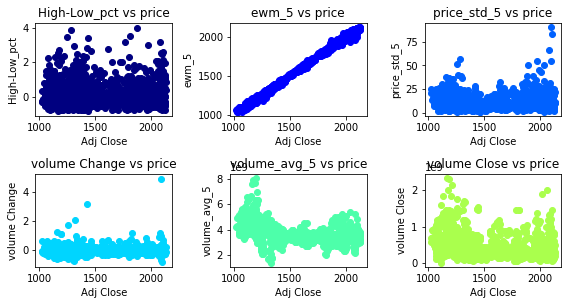

In [104]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation_plot(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation_plot(SPY_data,variables,3,3)

Compute the correlation matrix between the features and the target variable. A correlation matrix is used to evaluate the dependency between several variables at the same time. The result is a table containing the correlation coefficients between each variable and the others.

The three most common methods are:
- *Pearson* : standard correlation coefficient
- *Kendall* : Kendall Tau correlation coefficient
- *Spearman* : Spearman rank correlation

Pandas allows us to compute the correlation matrix using method `.corr(method='pearson', min_periods=1)`, which has the following options:
- *method* that can be one element of that list {‘pearson’, ‘kendall’, ‘spearman’} or a callable, a function that you would have designed yourself. By default, the pearson method is used.
- *min_periods* Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

From that table we should pick the 'Adj Close' column and look for only the 6 variables that we have chosen. You might use the `variables` list that we have created in last python block.

In [109]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.071823
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

For a more complete view of all relationships between parameter you can use `pairplot`, which is a seaborn function. `pairplot` plots pairwise relationships in a dataset. It is to call carefully because using pairplot might require a lot of computational ressources.

By default, this function will create a grid of graphs such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

There are options that allow you to select particular columns, rows or specific features for classification, which can be seen on: https://seaborn.pydata.org/generated/seaborn.pairplot.html

Here, we will use the default way: `pairplot(SPY_data)`

In [1]:
import seaborn as sns

sns.set()
#sns.pairplot(SPY_data);

As we can observe, either the scatterplot or the correlation matrix reflects that the Exponential Moving Average for 5 periods is highly correlated with the Adj Close variable. Secondly is possible to observe a negative correlation between Adj Close and the volume average for 5 days and with the volume to Close ratio.

### Train the Dataset and Fit the model

Due to the feature calculation, the SPY_data contains some *NaN* values that correspond to the first’s rows of the exponential and moving average columns. We will see how many Nan values there are in each column and then remove these rows.

Check if there are null variable inside the dataset and drop them if there are some.

Generate a training set and a testing set.

In [113]:
print(SPY_data.isnull().sum().loc[variables]) # print NaN values

# To train the model is necessary to drop any missing value in the dataset.

SPY_data = SPY_data.dropna(axis=0)

# Generate the train and test sets

train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

High-Low_pct     1
ewm_5            1
price_std_5      5
volume Change    1
volume_avg_5     5
volume Close     5
dtype: int64


In [114]:
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Create the test features dataset (X_test) which will be used to make the predictions.

In [115]:
# Create the test features dataset (X_test) which will be used to make the predictions.

X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model

Y_test = test["Adj Close"].values 

Predict the Adj Close values using  the X_test dataframe and Compute the Mean Squared Error between the predictions and the real observations.

In [121]:
close_predictions = lr.predict(X_test)   

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(Y_test, close_predictions)))

mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]

round(mae,2)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, close_predictions))

sqrt(Mean squared error): 23.04
Coefficient of determination: 0.84


We have that the Mean Absolute Error of the model is 17.38. This metric is more intuitive than others such as the Mean Squared Error, in terms of how close the predictions were to the real price.

Finally we will plot the error term for the last 25 days of the test dataset. This allows observing how long is the error term in each of the days, and asses the performance of the model by date. 

In [21]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
df1

,Date,Actual,Predicted
205,2015-02-06,2055.469971,2070.244222
206,2015-02-05,2062.520020,2065.851129
207,2015-02-04,2041.510010,2062.043858
208,2015-02-03,2050.030029,2054.431129
209,2015-02-02,2020.849976,2051.891452
...,...,...,...
225,2015-01-08,2062.139893,2031.302986
226,2015-01-07,2025.900024,2043.449640
227,2015-01-06,2002.609985,2035.116830
228,2015-01-05,2020.579956,2028.340347


C:\Users\Nicolas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


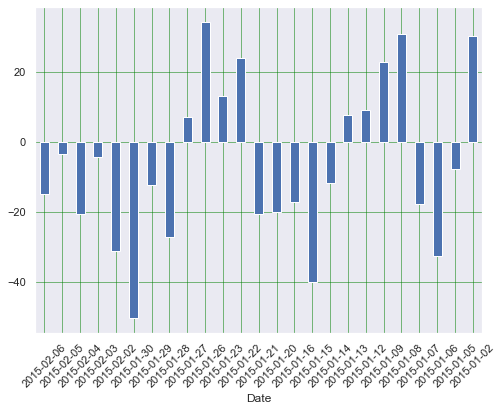

In [22]:
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()